# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [53]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [54]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [55]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

In [56]:
# Define the correct order for SOCIAL_CLASS
final_fies['SOCIAL_CLASS'] = pd.Categorical(
    final_fies['SOCIAL_CLASS'], 
    categories=['Poor', 'Low income', 'Lower-middle income', 'Middle income'], 
    ordered=True
)

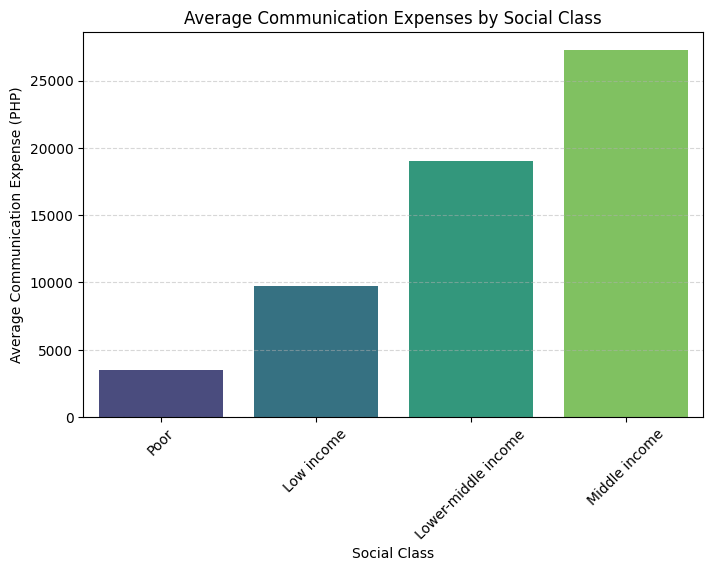

In [57]:
# Group by social class with observed=False and order correctly
avg_comm_expense = (
    final_fies.groupby('SOCIAL_CLASS', observed=False)['COMMUNICATION']
    .mean()
    .reset_index()
)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='SOCIAL_CLASS', y='COMMUNICATION', data=avg_comm_expense, palette='viridis', hue='SOCIAL_CLASS')

plt.title('Average Communication Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Communication Expense (PHP)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Average Communication Expenses by Social Class

This visualization shows the average expenditure for the communications category by the different social classes. The graph shows that the 'Middle income' social class have the highest average communication expense which can mean people in this group tend to utilize communication services for work or social engagement.

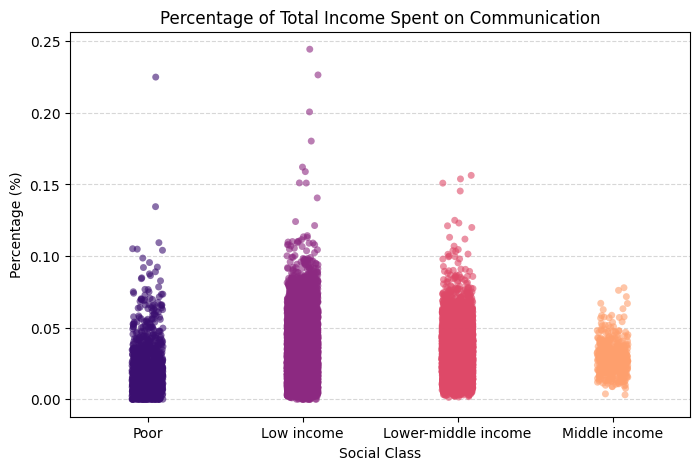

In [58]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x='SOCIAL_CLASS', 
    y=final_fies['COMMUNICATION'] / final_fies['TOINC'], 
    data=final_fies, 
    jitter=True,           
    alpha=0.6,             
    size=5,                
    palette='magma',      
    hue='SOCIAL_CLASS'    
)

plt.title('Percentage of Total Income Spent on Communication')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.show()


Percentage of Total Income Spent on Communication

This visualization shows the percentage of total income spent on communication services per social group. The Middle income social group have the least or none 0.0% for percentage for communication expense which can mean people of this group have a sure financial capability or may be required to have communication services.

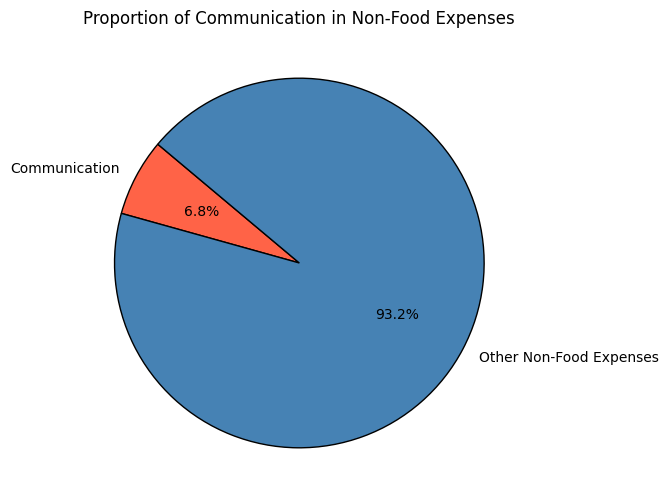

In [59]:
nfood_total = final_fies['NFOOD'].sum()
communication_total = final_fies['COMMUNICATION'].sum()
remaining_nfood = nfood_total - communication_total

labels = ['Communication', 'Other Non-Food Expenses']
sizes = [communication_total, remaining_nfood]
colors = ['#FF6347', '#4682B4']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Proportion of Communication in Non-Food Expenses')
plt.show()


Proportion of Communication in Non-Food Expenses

This visualization shows the percentage of communication expense for all non-food expenses. It shows a 6.8% which can mean that communication is considered an important expense for daily life in NCR

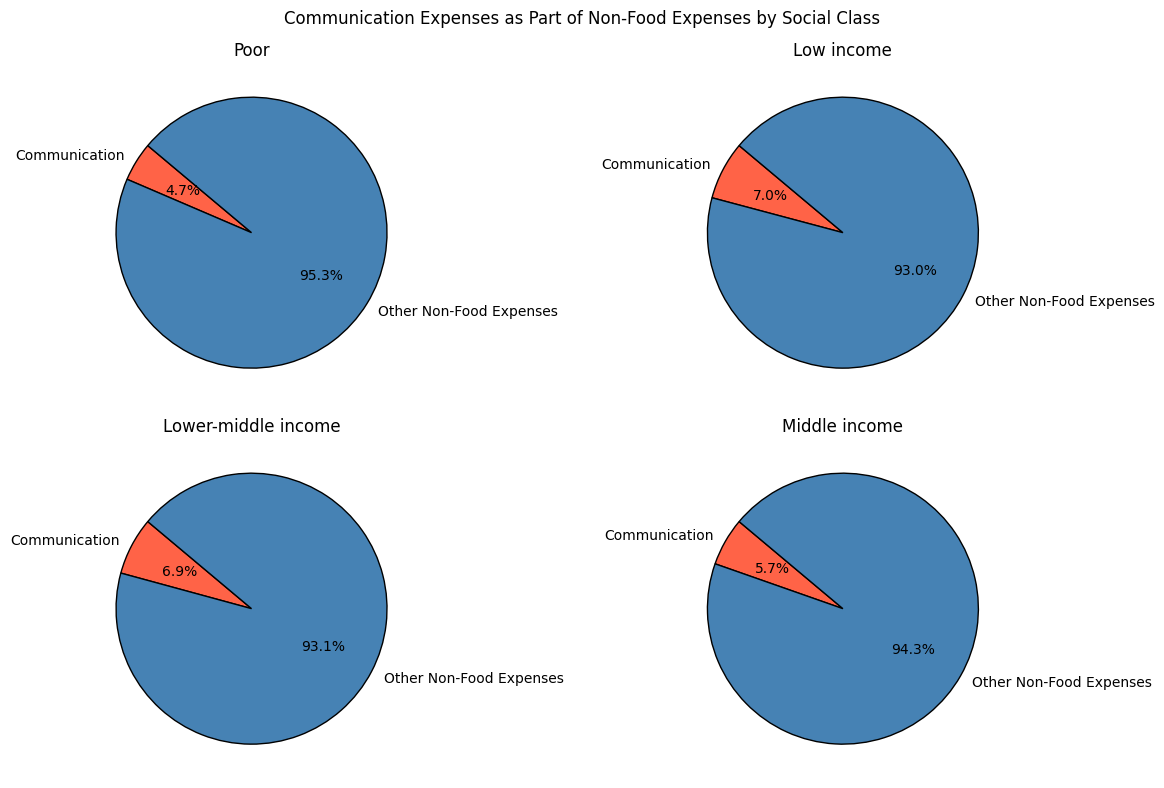

In [60]:
# Group data by social class with observed=False
grouped_data = final_fies.groupby('SOCIAL_CLASS', observed=False).agg({
    'COMMUNICATION': 'sum',
    'NFOOD': 'sum'
})

# Create subplot layout
num_classes = len(grouped_data)
rows = (num_classes // 2) + (num_classes % 2 > 0)  # For row layout

fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))
axes = axes.flatten()

# Pie charts for each social class
for idx, (class_name, row) in enumerate(grouped_data.iterrows()):
    communication_total = row['COMMUNICATION']
    remaining_nfood = row['NFOOD'] - communication_total

    sizes = [communication_total, remaining_nfood]
    labels = ['Communication', 'Other Non-Food Expenses']

    axes[idx].pie(sizes, labels=labels, autopct='%.1f%%', 
                  colors=['#FF6347', '#4682B4'],
                  startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

    axes[idx].set_title(f'{class_name}')

# Turn off empty subplot axes
for idx in range(len(grouped_data), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Communication Expenses as Part of Non-Food Expenses by Social Class')
plt.tight_layout()
plt.show()


Communication Expenses as Part of Non-Food Expenses by Social Class

This visualization shows the proportion of Communication in Non-Food Expenses by Social Classes. It shows low and lower middle income social groups have the highest percentage spent for communications expenditure which can mean that the minimum price for communications is expensive for this groups or a result of budget allocations.